[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dancsomarci/Self-Driving-in-Duckietown/blob/milestone_1/Visualization.ipynb)

In [ ]:
# Importing dependencies
from matplotlib import pyplot as plt
import zipfile
import pickle
import os
import cv2
import random

In [ ]:
%matplotlib inline 

In [ ]:
# Download raw dataset from google drive
!gdown 1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl --output /tmp/savedData.zip
local_zip = '/tmp/savedData.zip'
raw_data_path = "/tmp/savedData/"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall(raw_data_path)
zip_ref.close()

Downloading...
From: https://drive.google.com/uc?id=1ijLy-ApHuiVXo78gSbi7nqeRBXzZJHBl
To: /tmp/savedData.zip
100% 34.9M/34.9M [00:00<00:00, 209MB/s]


In [ ]:
sampled_frames = []

# Reading saved raw data into sampled_frames
for filename in os.listdir(raw_data_path):
    file = open(os.path.join(raw_data_path, filename), "rb")
    sampled_frames = random.sample(pickle.load(file), 5)

In [ ]:
def display_frames(frames: list, cmap=None):
  fig, axs = plt.subplots(1, len(frames), figsize=(20,20))
  fig.tight_layout()
  for ax, (label, img) in zip(axs, frames):
    ax.imshow(img, cmap=cmap)
    ax.set_title("label: " + str(label))

  plt.show()

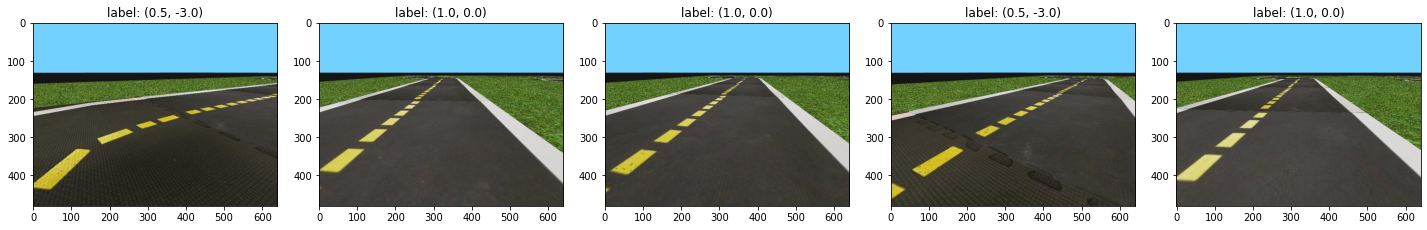

In [ ]:
# Display raw data
display_frames(sampled_frames)

In [ ]:
# processing frames with opencv
scale_precent = 0.2     # used for downscaling
crop_amount = 35        # pixel amount for cropping

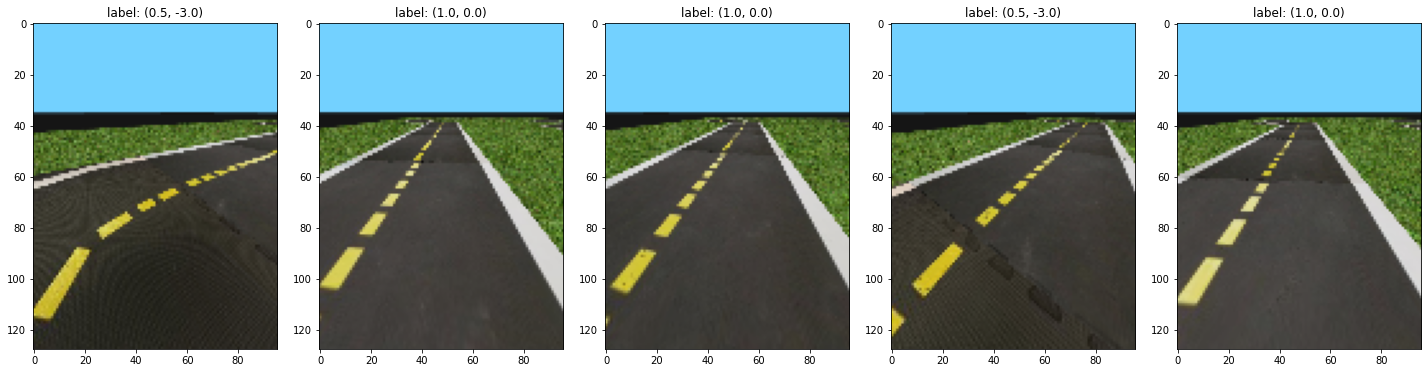

In [ ]:
# downscaling
down_scaled_frames = []
for label, img in sampled_frames:
  newHeight = int(img.shape[0] * scale_precent)
  newWidth = int(img.shape[1] * scale_precent)
  down_scaled_frames.append((label, cv2.resize(img, (newHeight, newWidth))))

display_frames(down_scaled_frames)

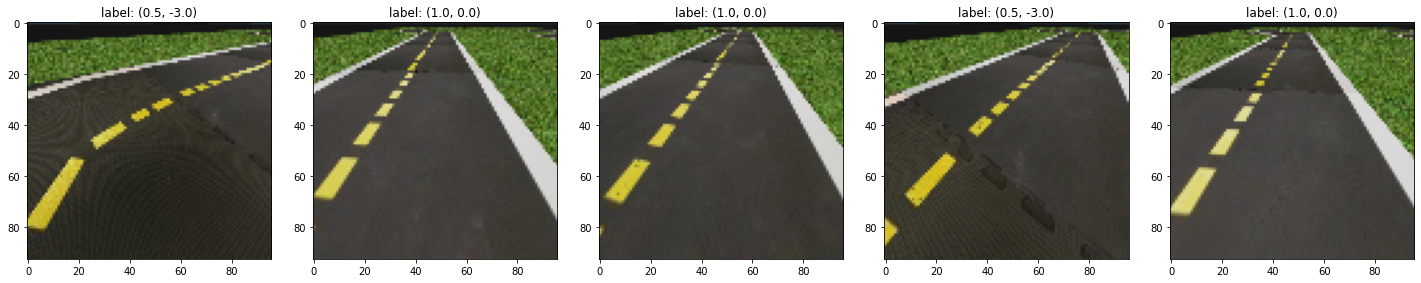

In [ ]:
# cropping
cropped_frames = []
for label, img in down_scaled_frames:
  ds_size = img.shape
  cropped_frames.append((label, img[crop_amount : ds_size[0], 0 : ds_size[1]]))

display_frames(cropped_frames)

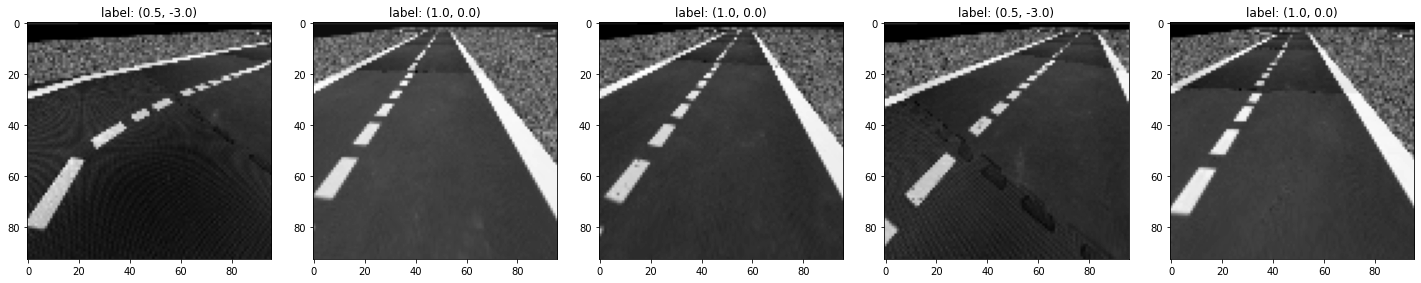

In [ ]:
# grayscaling
grayscale_frames = []
for label, img in cropped_frames:
  grayscale_frames.append((label, cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)))

display_frames(grayscale_frames, "gray")

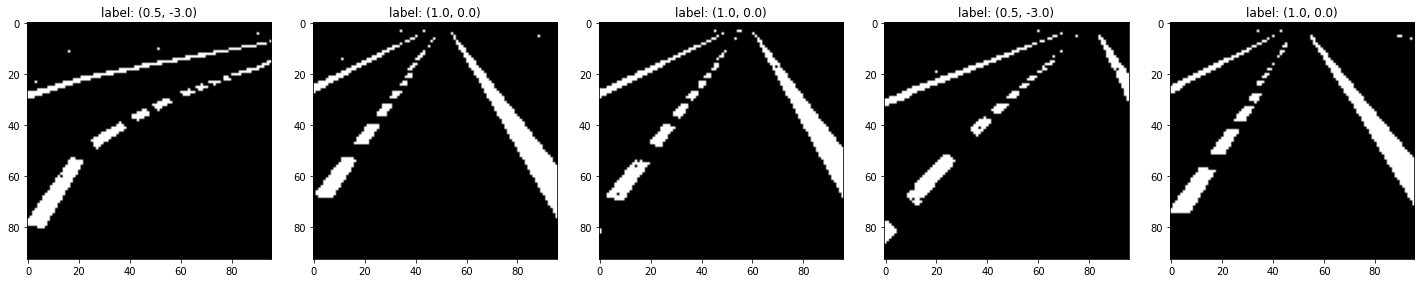

In [ ]:
# thresholding
binary_frames = []
for label, img in grayscale_frames:
  _, thresholded_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
  binary_frames.append((label, thresholded_img))

display_frames(binary_frames, "gray")